# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
import json
import datetime


# Import API key, renamed as 'config'
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [24]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [25]:
#example run from OpenWeather data

url_base = 'http://api.openweathermap.org/data/2.5/weather?'

unit = 'imperial'

example = 'Beijing'

url = f'{url_base}appid={api_key}&q={example}&units={unit}'

res1 = requests.get(url).json()

res1



{'coord': {'lon': 116.3972, 'lat': 39.9075},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 76.57,
  'feels_like': 77.83,
  'temp_min': 74.89,
  'temp_max': 77.77,
  'pressure': 1001,
  'humidity': 83,
  'sea_level': 1001,
  'grnd_level': 996},
 'visibility': 10000,
 'wind': {'speed': 4.32, 'deg': 63, 'gust': 9.17},
 'rain': {'1h': 0.15},
 'clouds': {'all': 85},
 'dt': 1623602699,
 'sys': {'type': 2,
  'id': 2021025,
  'country': 'CN',
  'sunrise': 1623617122,
  'sunset': 1623671042},
 'timezone': 28800,
 'id': 1816670,
 'name': 'Beijing',
 'cod': 200}

In [29]:
#set up lists to gather data from API calls

city_name = []
city_country = []
city_lon = []
city_lat = []
dates = []
temp = []
humidity = []
cloudiness = []
windspeed = []

city_counter = 1
set_counter = 1

print('Beginning Data Retrieval')
print('-----------------------------')
#set up for loop to search relevant data for the cities in the 'cities' list

for city in cities:
    query_url = f'{url_base}appid={api_key}&q={city}&units={unit}'
    response = requests.get(query_url).json()
    
    
    try: 
        city_name.append(response['name'])
        city_country.append(response['sys']['country'])
        city_lon.append(response['coord']['lon'])
        city_lat.append(response['coord']['lat'])
        dates.append(response['dt'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        
        print(f'Processing Record {city_counter} of Set {set_counter} | {city}')
        
        city_counter += 1
        
        if city_counter > 50:
            
            city_counter = 1
            set_counter +=1
        
        
    except:
        print(f'City "{city}" not found. Skipping...')

print('-----------------------------')
print('Data Retrieval Complete')      
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | marzuq
Processing Record 2 of Set 1 | kidal
Processing Record 3 of Set 1 | sorong
Processing Record 4 of Set 1 | qaanaaq
City "mys shmidta" not found. Skipping...
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | celestun
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | sumkino
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | saint george
Processing Record 11 of Set 1 | utica
Processing Record 12 of Set 1 | ushuaia
City "kleck" not found. Skipping...
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | le port
Processing Record 15 of Set 1 | chany
Processing Record 16 of Set 1 | yulara
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | dzhebariki-khaya
Processing Record 20 of Set 1 | kimbe
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set

Processing Record 32 of Set 4 | atar
Processing Record 33 of Set 4 | bengkulu
Processing Record 34 of Set 4 | esmeralda
Processing Record 35 of Set 4 | caborca
Processing Record 36 of Set 4 | lachi
Processing Record 37 of Set 4 | touros
Processing Record 38 of Set 4 | ambam
Processing Record 39 of Set 4 | brandenburg
Processing Record 40 of Set 4 | geraldton
Processing Record 41 of Set 4 | kapiri mposhi
Processing Record 42 of Set 4 | mar del plata
Processing Record 43 of Set 4 | isangel
Processing Record 44 of Set 4 | tieling
Processing Record 45 of Set 4 | pringsewu
Processing Record 46 of Set 4 | samarai
City "kawana waters" not found. Skipping...
Processing Record 47 of Set 4 | emba
Processing Record 48 of Set 4 | makakilo city
Processing Record 49 of Set 4 | christiansburg
Processing Record 50 of Set 4 | harjavalta
Processing Record 1 of Set 5 | katangli
Processing Record 2 of Set 5 | pangody
Processing Record 3 of Set 5 | kudahuvadhoo
Processing Record 4 of Set 5 | trincomalee
Pr

Processing Record 21 of Set 8 | nova olinda do norte
Processing Record 22 of Set 8 | kruisfontein
Processing Record 23 of Set 8 | hualmay
Processing Record 24 of Set 8 | la romana
Processing Record 25 of Set 8 | petrozavodsk
Processing Record 26 of Set 8 | santa cruz
Processing Record 27 of Set 8 | marsh harbour
Processing Record 28 of Set 8 | maumere
Processing Record 29 of Set 8 | chelmsford
City "artyk" not found. Skipping...
City "falealupo" not found. Skipping...
Processing Record 30 of Set 8 | halapitan
Processing Record 31 of Set 8 | tupik
Processing Record 32 of Set 8 | grindavik
Processing Record 33 of Set 8 | cairns
Processing Record 34 of Set 8 | chunhuhub
Processing Record 35 of Set 8 | norman wells
Processing Record 36 of Set 8 | acapulco
Processing Record 37 of Set 8 | wagar
Processing Record 38 of Set 8 | kamenka
Processing Record 39 of Set 8 | sungaipenuh
Processing Record 40 of Set 8 | bathsheba
Processing Record 41 of Set 8 | jiamusi
Processing Record 42 of Set 8 | am

Processing Record 2 of Set 12 | san pedro
Processing Record 3 of Set 12 | nelson bay
Processing Record 4 of Set 12 | itainopolis
Processing Record 5 of Set 12 | san vicente
Processing Record 6 of Set 12 | valleyview
Processing Record 7 of Set 12 | bubaque
Processing Record 8 of Set 12 | palu
Processing Record 9 of Set 12 | lazaro cardenas
Processing Record 10 of Set 12 | fare
Processing Record 11 of Set 12 | broome
Processing Record 12 of Set 12 | abashiri
Processing Record 13 of Set 12 | ossora
Processing Record 14 of Set 12 | koumac
Processing Record 15 of Set 12 | chicama
Processing Record 16 of Set 12 | paamiut
Processing Record 17 of Set 12 | bani walid
Processing Record 18 of Set 12 | ocampo
Processing Record 19 of Set 12 | thaton
Processing Record 20 of Set 12 | sobolevo
Processing Record 21 of Set 12 | pangai
Processing Record 22 of Set 12 | novikovo
Processing Record 23 of Set 12 | novopavlovka
Processing Record 24 of Set 12 | mackay
Processing Record 25 of Set 12 | saint-deni

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [60]:
#generate a dataframe

df1 = pd.DataFrame({'City':city_name,'Lat':city_lat,'Lng':city_lon,
                    'Max Temp':temp,'Humidity':humidity,'Cloudiness':cloudiness,
                    'Wind Speed':windspeed,'Country':city_country,'Date':dates})

df1['Date'] = pd.to_datetime(df1['Date'], unit = 's')


df1

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Marzuq,14.4000,46.4667,81.37,26,71,4.07,YE,2021-06-13 17:47:43
1,Kidal,18.4411,1.4078,106.11,9,3,3.96,ML,2021-06-13 17:47:43
2,Sorong,-0.8833,131.2500,78.96,84,90,5.30,ID,2021-06-13 17:47:12
3,Qaanaaq,77.4840,-69.3632,37.22,81,35,1.88,GL,2021-06-13 17:47:43
4,Rikitea,-23.1203,-134.9692,74.95,76,13,10.07,PF,2021-06-13 17:47:44
...,...,...,...,...,...,...,...,...,...
576,Burns Lake,54.2331,-125.7533,60.22,45,57,4.52,CA,2021-06-13 17:50:14
577,‘Ewa Beach,21.3156,-158.0072,75.15,70,90,5.01,US,2021-06-13 17:50:14
578,Radovitskiy,55.1282,39.7956,65.08,92,22,4.52,RU,2021-06-13 17:50:15
579,Līsakovsk,52.5369,62.4936,66.60,35,62,8.66,KZ,2021-06-13 17:47:21


In [54]:
#check the number of counts and etc.
df1.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000
mean,18.608256,21.877631,69.695697,69.108434,59.247849,7.728881
std,33.419645,90.708468,15.170112,21.813400,36.319756,5.575782
min,-54.800000,-175.200000,31.030000,7.000000,0.000000,0.000000
25%,-8.540600,-56.138100,58.730000,56.000000,22.000000,3.600000
50%,19.729700,26.400000,72.970000,74.000000,71.000000,6.260000
75%,47.978100,102.350000,80.290000,86.000000,94.000000,10.360000
max,78.218600,179.316700,108.820000,100.000000,100.000000,29.930000


In [56]:
#convert dataframe to an output csv file
df1.to_csv('../output_data/cityinfo.csv',index=False,header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [57]:
#check if there is any value of humidity over 100%, should not be as within .describe() the max value is 100.000...
df1['Humidity'].value_counts()

#as displayed the max value is 88%, hence no further action required at this step

88    19
76    19
90    17
82    15
74    15
      ..
13     1
12     1
43     1
44     1
7      1
Name: Humidity, Length: 89, dtype: int64

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

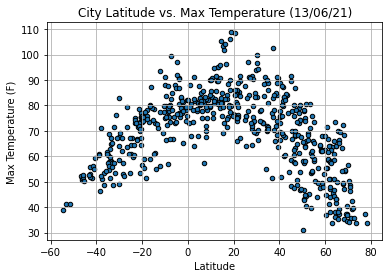

In [71]:
#ploting Temp vs Lat

tvsl = df1.plot(kind='scatter',x='Lat',y='Max Temp',edgecolor='black',facecolor='blue')

tvsl.set_title("City Latitude vs. Max Temperature (13/06/21)")
tvsl.set_xlabel('Latitude')
tvsl.set_ylabel('Max Temperature (F)')


plt.grid()

plt.savefig('../output_data/tvsl.png')

This is a relatively perfect match to the reality as from the earth equator at 0 degree of latitude (or say -23.43 D to +23.43D are the tropic zones) , the temperature drops down to either north and south. If we change the xlabel to the absolute values, it is clearly to say that as the latitude increases, the temperature will drop down. Hence it will show a strong correlation between these two factors.

## Latitude vs. Humidity Plot

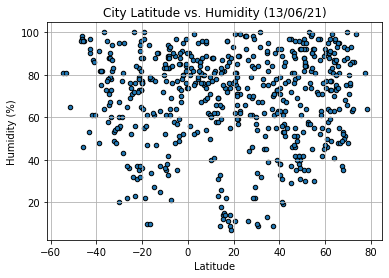

In [72]:
#ploting Humidity vs Lat

hvsl = df1.plot(kind='scatter',x='Lat',y='Humidity',edgecolor='black',facecolor='blue')

hvsl.set_title("City Latitude vs. Humidity (13/06/21)")
hvsl.set_xlabel('Latitude')
hvsl.set_ylabel('Humidity (%)')


plt.grid()

plt.savefig('../output_data/hvsl.png')

Humidity has no strong correlation to latitude however it shows that more cities have higher humidity.

## Latitude vs. Cloudiness Plot

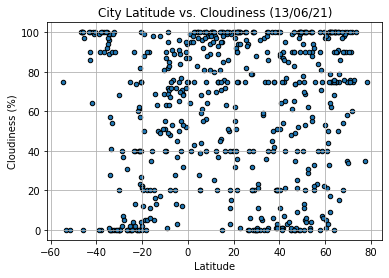

In [73]:
#ploting Cloudiness vs Lat

cvsl = df1.plot(kind='scatter',x='Lat',y='Cloudiness',edgecolor='black',facecolor='blue')

cvsl.set_title("City Latitude vs. Cloudiness (13/06/21)")
cvsl.set_xlabel('Latitude')
cvsl.set_ylabel('Cloudiness (%)')


plt.grid()

plt.savefig('../output_data/cvsl.png')

Cloudiness shows it distributes widely and it looks like that there is no correlation at all.

## Latitude vs. Wind Speed Plot

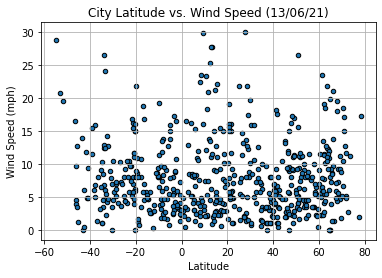

In [74]:
#ploting WindSpeed vs Lat

wvsl = df1.plot(kind='scatter',x='Lat',y='Wind Speed',edgecolor='black',facecolor='blue')

wvsl.set_title("City Latitude vs. Wind Speed (13/06/21)")
wvsl.set_xlabel('Latitude')
wvsl.set_ylabel('Wind Speed (mph)')


plt.grid()

plt.savefig('../output_data/wvsl.png')

Just like a mirror image of Humidity, poor correlation and mroe cities have the wind speed of less than 15mph.

## Linear Regression

In [77]:
#split the data into north and south hemisphere

df_north = df1.loc[df1['Lat']>=0,:]
df_south = df1.loc[df1['Lat']<0,:]

print(df_north.head())
print(df_south.head())

       City      Lat      Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0    Marzuq  14.4000  46.4667     81.37        26          71        4.07   
1     Kidal  18.4411   1.4078    106.11         9           3        3.96   
3   Qaanaaq  77.4840 -69.3632     37.22        81          35        1.88   
5  Celestún  20.8667 -90.4000     81.23        75          92        7.85   
7   Sumkino  58.1108  68.3244     62.37        63          71        5.73   

  Country                Date  
0      YE 2021-06-13 17:47:43  
1      ML 2021-06-13 17:47:43  
3      GL 2021-06-13 17:47:43  
5      MX 2021-06-13 17:47:44  
7      RU 2021-06-13 17:47:44  
       City      Lat       Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
2    Sorong  -0.8833  131.2500     78.96        84          90        5.30   
4   Rikitea -23.1203 -134.9692     74.95        76          13       10.07   
6     Vaini -21.2000 -175.2000     71.76        83          40        8.05   
11  Ushuaia -54.8000  -68.3000   

In [90]:
#define a function to run linear regression onto each of the dataset

def plot_linear(x_value,y_value,sub_title,sub_x,sub_y,xp,yp,filename):

    (slope,intercept,rvalue,pvalue,stedrr) = st.linregress(x_value,y_value)
    
    line_eq = 'y=' + str(round(slope,2)) + 'x+' + str(round(intercept,2))
    
    regress_value = x_value * slope + intercept
    
    plt.scatter(x_value,y_value)
    plt.plot(x_value,regress_value,'r-')
    
    plt.title(sub_title)
    plt.xlabel(sub_x)
    plt.ylabel(sub_y)
    plt.annotate(line_eq,(xp,yp),fontsize=15,color = 'red')
    
    print(f'The r-value is: {rvalue}')
    print(f'The r-squared value is: {rvalue**2}')
    plt.savefig(f'../output_data/{filename}')
    
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.7228548049351985
The r-squared value is: 0.5225190690179039


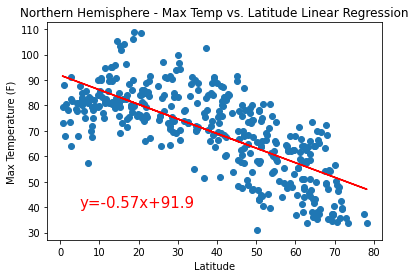

In [92]:
plot_linear(df_north['Lat'],df_north['Max Temp'],
            'Northern Hemisphere - Max Temp vs. Latitude Linear Regression',
            'Latitude','Max Temperature (F)',5,40,'North tvsl.png')



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7822591574902916
The r-squared value is: 0.6119293894774209


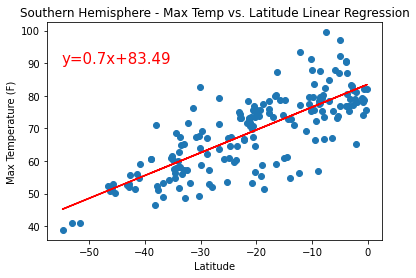

In [93]:
plot_linear(df_south['Lat'],df_south['Max Temp'],
            'Southern Hemisphere - Max Temp vs. Latitude Linear Regression',
            'Latitude','Max Temperature (F)',-55,90,'South tvsl.png')

# Northern & Southern - Max Temp vs. Latitude

The r-value is -0.72, which shows a strong correlation between the max temp and latitude in the northern hemisphere. Whereas the r-sqr value is 0.52, means that 52% of data lays on this linear line. As the latitude increases, i.e. further to the north, the max temperature will decrease.
The r-value is 0.78, same as the northern hemisphere, it has a strong correlation against latitude. And this time there is 61% of the data could be found on the line of equation. With this positive regression, as the latitude increases, the max temperature will increase as well.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.06807688468533905
The r-squared value is: 0.004634462228460951


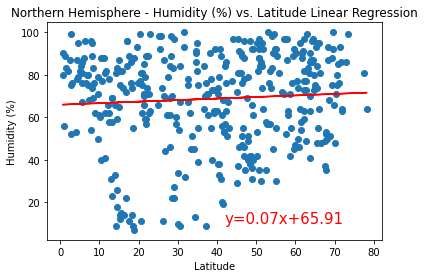

In [94]:
plot_linear(df_north['Lat'],df_north['Humidity'],
            'Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression',
            'Latitude','Humidity (%)',42,10,'North hvsl.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.08326000437315033
The r-squared value is: 0.006932228328217012


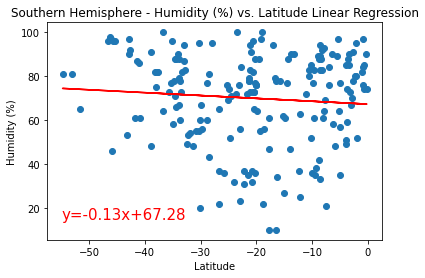

In [96]:
plot_linear(df_south['Lat'],df_south['Humidity'],
            'Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression',
            'Latitude','Humidity (%)',-55,15,'South hvsl.png')

# Northern & Southern - Humidity vs. Latitude

The r-value is 0.07, very weak correlation between the humidity and latitude in the northern hemisphere. With only 0.4% of data lays on the line, it is fair to say that there is no much relative relationship shown. The line appears nearly a horizontal line, it is another way of saying that these two factors are not related to each other. Same as the northern, the r-value in southern is -0.08, and the r-sqr value is 0.007. Very weak relation and few data allocates on the line.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.06590651427202196
The r-squared value is: 0.004343668623488234


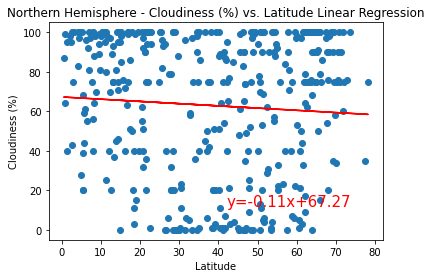

In [98]:
plot_linear(df_north['Lat'],df_north['Cloudiness'],
            'Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression',
            'Latitude','Cloudiness (%)',42,12,'North cvsl.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0036202849798353367
The r-squared value is: 1.3106463335221344e-05


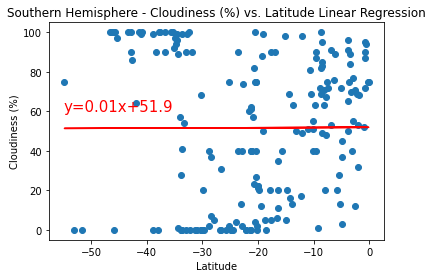

In [99]:
plot_linear(df_south['Lat'],df_south['Cloudiness'],
            'Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression',
            'Latitude','Cloudiness (%)',-55,60,'South cvsl.png')

# Northern & Southern - Cloudiness vs. Latitude

r-values for northern and southern are -0.07 and 0.003, very weak correlation and only a few data fit into the drawing for both hemispheres. Same as the study of humidity, both plots show a horizontal linear lines. It is interesting to see that a lot of cities either has 100% cloudiness or 0% cloudiness for both hemispheres. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.017165329508098508
The r-squared value is: 0.00029464853712159736


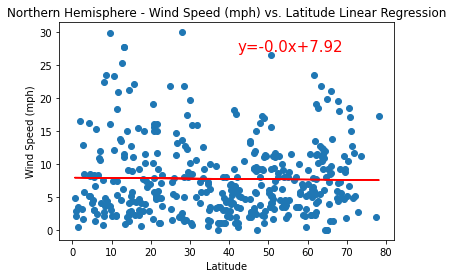

In [101]:
plot_linear(df_north['Lat'],df_north['Wind Speed'],
            'Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression',
            'Latitude','Wind Speed (mph)',42,27,'North wvsl.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.19214911822802777
The r-squared value is: 0.03692128363580859


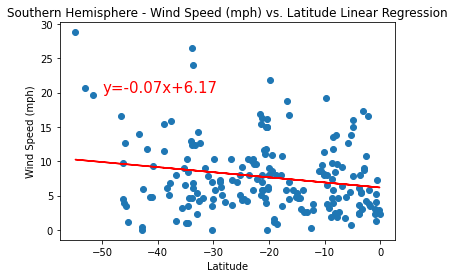

In [103]:
plot_linear(df_south['Lat'],df_south['Wind Speed'],
            'Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression',
            'Latitude','Wind Speed (mph)',-50,20,'South wvsl.png')

# Northern & Southern - Wind Speed vs. Latitude

The r-value in northern is -0.017, a very weak correlation whereas the southern has a r-value of -0.19, still weak but much better scenario. It is because there are fewer cities in the southern hemisphere hence it is easier to have a better fit to the line of equation. The northern hemisphere however, has a pure horizontal line so it is easy to conclude that there is no relation at all within these two factors there.

# Observable Trends

1. The maximum temperature has a strong correlation coefficient value against latitude which meets the expectation from the reality. However, it might be better to have the temperature from the OpenWeather instead of the max temp.

2. The rest analysis of 'Humidity, Cloudiness and Wind Speed' are basically irrelevant to the latitude. They may, however, have some inner relations to each other. It may require further analysis accordingly.

3. There are more cities found in the northern hemisphere which again, meets the expectation from the reality.